In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [14]:
def plots(mb,fltr='cinv',ytype='nilc',mtype=0,dtype='dr2_smica',cmask='Lmask',form='{:.2f}'):

    pl.plot_1dstyle(fsize=[10,3],ymin=-1,ymax=1,ylab=r'$L^2C_L^{\tau y}/2\pi$')
    s = 1e10 * mb.bc
    
    for bhe, bhlab in zip([None,['lens'],['lens','src']],['none','lens','lens-src']):
        mcb, vcb, scb, ocb = tools_y.load_binned_ty(mb,dtype=dtype,fltr=fltr,mtype=mtype,ytype=ytype,cmask=cmask,bhe=bhe)
        errorbar(mb.bc,s*ocb,yerr=s*vcb,fmt='o',label=bhlab)
        st = ana.PTEs(ocb,scb,comment=ytype+','+str(mtype),x1pte=True)
    
    axhline(0.,color='k',ls='--')
    
    figtext(.2,.20,'ymap:'+ytype+','+str(mtype))
    figtext(.2,.25,'tau:'+dtype+','+str(cmask))
    figtext(.2,.30,r'$\chi$-PTE:'+str(form.format(st.px1)))
    figtext(.2,.35,r'$\chi^2$-PTE:'+str(form.format(st.px2)))
    legend()
    show()

In [15]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

chi: 29.4 , chi (sim mean): 0.0 , chi (sim std): 2.8 , PTE: 0.00 (nilc,0)
chi^2: 221.2 , chi^2 (sim): 11.1 , PTE: 0.00 (nilc,0)
chi: 0.7 , chi (sim mean): -0.0 , chi (sim std): 2.8 , PTE: 0.84 (nilc,0)
chi^2: 13.8 , chi^2 (sim): 11.1 , PTE: 0.28 (nilc,0)
chi: 3.0 , chi (sim mean): 0.0 , chi (sim std): 3.0 , PTE: 0.36 (nilc,0)
chi^2: 14.6 , chi^2 (sim): 11.1 , PTE: 0.22 (nilc,0)


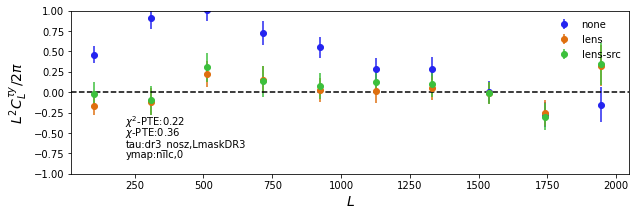

In [16]:
#plots(mb)
#plots(mb,fltr='none')
#plots(mb,ytype='milca')
#plots(mb,mtype=1)
#plots(mb,dtype='dr2_nilc')
#plots(mb,cmask='G60Lmask')
plots(mb,dtype='dr3_nosz',cmask='LmaskDR3')

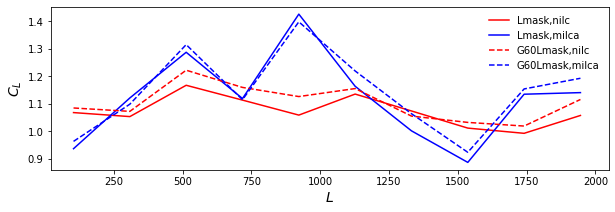

In [18]:
__, vcb0, scb, __ = tools_y.load_binned_ty(mb,bhe=None)
pl.plot_1dstyle()
for dtype in ['dr2_smica']:
    for cmask, ls in [('Lmask','-'),('G60Lmask','--')]:
        for ytype, co in [('nilc','r'),('milca','b')]:
            __, vcb, __, __ = tools_y.load_binned_ty(mb,dtype=dtype,ytype=ytype,cmask=cmask)
            plot(mb.bc,vcb/vcb0,ls=ls,color=co,label=cmask+','+ytype)
legend()